<a href="https://colab.research.google.com/github/AuleVala/cap-comp215/blob/main/Dexter_Hine_COMP_215_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 1
----------------
#### Name: Dexrer Hine
#### Date: 10/01/2022
This lab exercise is mostly to introduce some of the power in Jupyter Notebooks.
Note that a Notebook is composed of "cells" - some are "text", like this one, while others are "code"

The code cell below simply imports all the modules we'll be using...

In [79]:
import datetime, json, requests
import matplotlib.pyplot as plt
import  matplotlib.dates as mdates
from pprint import pprint #pprint is pretty print


Now, let's fetch some Covid-19 daily case-count data from:  https://opencovid.ca/api/

Query:
  - `stat=cases`        # the type of data to fetch
  - `loc=BC`            # the location to fetch data for
  - `after=01-12-2021`  # since the 1st of december (note date format:  dd-mm-yyyy)

In [80]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=BC&after=01-12-2021'

response = requests.request("GET", query, headers={}, data={}) 


Notice that the response is just a string of text (most data is exchanged on the web as plain text!)

The `json.loads` function "parses" such text and loads the data into a dictionary...

In [81]:
result = json.loads(response.text)


Next we use "list comprehension" to extract the list of dates and associated cases into "parallel lists"

Notice how we convert the date strings, using strptime, into a real date objects so they are easier to work with (format: dd-mm-yyyy)

In [82]:
#date_strings = [daily['date_report'] for daily in result['cases']]
#dates = [datetime.datetime.strptime(date, '%d-%m-%Y').date() for date in date_strings]
#cases = [daily['cases'] for daily in result['cases']]
#print(dates[0])
#print(cases)

## Exercise 1

In the code cell below, re-write each of the 3 "list comprehensions" above as a loop so you understand how they work.

Notice that a "list comprehension" is a compact way to write a "list accumlator" algorithm (and more efficient too!)

In [83]:
# Your code here

def listify_health_data(result):
  cases = []
  date_strings = []
  dates = []
  for days in range(len(result['cases'])):
    cases.append(result['cases'][days]['cases'])
    date_strings.append(result['cases'][days]['date_report'])
    dates.append(datetime.datetime.strptime(date_strings[days], '%d-%m-%Y').date())
  return [cases, dates]

cases_and_dates = listify_health_data(result)
cases = cases_and_dates[0]
dates = cases_and_dates[1]

Finally, we'll plot the (dates,cases) data as a nice x-y line graph.

The code to format the x-axis labels is taken from https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html



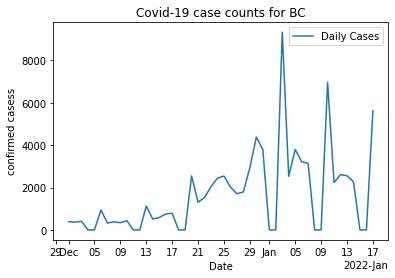

In [84]:
def format_date_axis(ax):
  """ format the dates shown on the x-axis of given axes, ax  """
  locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
  formatter = mdates.ConciseDateFormatter(locator)
  ax.xaxis.set_major_locator(locator)
  ax.xaxis.set_major_formatter(formatter)

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, cases, label='Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('confirmed casess')  # Add a y-label to the axes.
ax.set_title("Covid-19 case counts for BC")  # Add a title to the axes.
ax.legend();

## Exercise 2

Repeat the analysis above, but this time only for Vancouver Coastal Health Region.

 * Try to modify as little code as you can (should be just a few characters), and re-run the analysis
 * You can get the location code for each health region here:  https://opencovid.ca/api/#health-region-codes
 * Can you generalize the code in the 2nd code cell to make it easier to repeat the analysis for different locations?  What about for different dates?

## Exercise 3

Notice that BC does not report case counts on weekends so the data plot looks erratic.

 * One way to fix that is to plot a "7-day rolling average" instead.
Each day, we take the average of the previous 7 days cases.
 * Add new code cell below, compute the 7-day rolling average for each day from the cases list.
 * Create a plot to display the rolling average data and compare your plost with the one produced above.

 Hints: you are free to do this however you like, but a quite elegant solution uses list comprehension, range, and slices


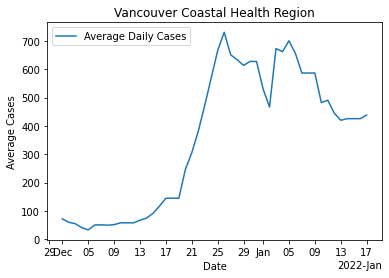

In [85]:
query = 'https://api.opencovid.ca/timeseries?stat=cases&loc=595&after=01-12-2021' # Changing location from BC to VCH 

response = requests.request("GET", query, headers={}, data={})
result = json.loads(response.text)

cases_and_dates = listify_health_data(result) 
cases = cases_and_dates[0]
dates = cases_and_dates[1]

def average_daily_cases(period):
  days = 1
  average_cases = []
  while days < period:
    average_cases.append(sum(cases[0:days])/days) 
    days = days +1
  while days <= len(cases):
    average_cases.append(sum(cases[(days-period):days])/period) 
    days = days +1
  return average_cases

ADC = average_daily_cases(7) 

fig, ax = plt.subplots()
format_date_axis(ax)
ax.plot(dates, ADC, label='Average Daily Cases')  # Plot some data on the axes.
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Average Cases')  # Add a y-label to the axes.
ax.set_title("Vancouver Coastal Health Region")  # Add a title to the axes.
ax.legend();